In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv(r"C:\DataSets-master\DataSets-master\Social_Network_Ads.csv")

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
X_feature=data.iloc[:,1:4]
Y_target=data.iloc[:,4]

In [6]:
X_feature.head(1)

,Gender,Age,EstimatedSalary
0,Male,19,19000


In [7]:
#X_feature.describe()

In [8]:
X_feature["Gender"]=X_feature.Gender.map({"Male":0,"Female":1})

In [9]:
X_feature

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_feature,Y_target,test_size=.30,random_state=101)

In [12]:
print("Sample in X_train {} and Ytrain {}".format(len(Xtrain),len(Ytrain)))
print("Sample in X_test {} and Ytest {}".format(len(Xtest),len(Ytest)))

Sample in X_train 280 and Ytrain 280
Sample in X_test 120 and Ytest 120


In [13]:
k=int(np.sqrt(len(Xtrain)))+1
k_range=range(1,k)
from sklearn.metrics import accuracy_score

In [14]:
acc_list=[]
for i in k_range:
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model=knn_model.fit(Xtrain,Ytrain)
    Yp=knn_model.predict(Xtest)
    knn_acc=accuracy_score(Yp,Ytest)
    acc_list.append(knn_acc)
    print("Accuracy is {} at k={}".format(knn_acc,i))

Accuracy is 0.8166666666666667 at k=1
Accuracy is 0.8416666666666667 at k=2
Accuracy is 0.8 at k=3
Accuracy is 0.8333333333333334 at k=4
Accuracy is 0.8 at k=5
Accuracy is 0.8333333333333334 at k=6
Accuracy is 0.825 at k=7
Accuracy is 0.8333333333333334 at k=8
Accuracy is 0.8333333333333334 at k=9
Accuracy is 0.825 at k=10
Accuracy is 0.825 at k=11
Accuracy is 0.825 at k=12
Accuracy is 0.825 at k=13
Accuracy is 0.8333333333333334 at k=14
Accuracy is 0.825 at k=15
Accuracy is 0.825 at k=16


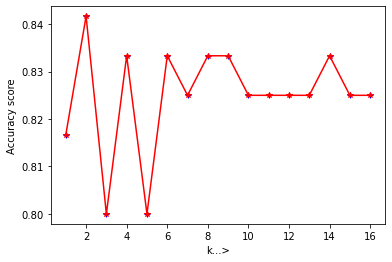

In [15]:
plt.plot(k_range,acc_list,'b+')
plt.plot(k_range,acc_list,'r*-')
plt.xlabel("k...>")
plt.ylabel("Accuracy score")
plt.show()

In [16]:
#feature scalling

In [17]:
X_feature.head(1)

,Gender,Age,EstimatedSalary
0,0,19,19000


In [18]:
X_feature.mean()

Gender                 0.510
Age                   37.655
EstimatedSalary    69742.500
dtype: float64

In [19]:
X_feature.std()

Gender                 0.500526
Age                   10.482877
EstimatedSalary    34096.960282
dtype: float64

In [20]:
XX_feature=X_feature

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [22]:
minMaxScaler=MinMaxScaler()
stdScaler=StandardScaler()

In [23]:
XX_scaleFeature=minMaxScaler.fit_transform(XX_feature)

In [24]:
XX_Std_scaleFeature=stdScaler.fit_transform(XX_feature)

In [25]:
round(XX_Std_scaleFeature.mean())

0

In [26]:
round(XX_Std_scaleFeature.std())

1

In [27]:
#training with XX_scaler

In [28]:
Xstrain,Xstest,Ystrain,Ystest=train_test_split(XX_scaleFeature,Y_target,test_size=.30,random_state=101)

In [37]:
acc_list_sc=[]
for i in k_range:
    knn_model_sc=KNeighborsClassifier(n_neighbors=i)
    knn_model_sc=knn_model_sc.fit(Xstrain,Ystrain)
    Yp=knn_model_sc.predict(Xstest)
    knn_acc=accuracy_score(Yp,Ystest)
    acc_list_sc.append(knn_acc)
   # print("Accuracy is {} at k={}".format(knn_acc,i))

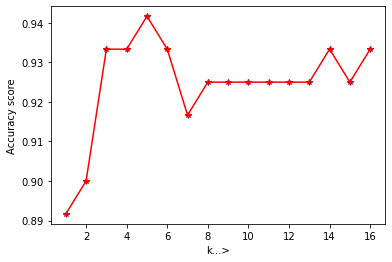

In [38]:
plt.plot(k_range,acc_list_sc,'b+')
plt.plot(k_range,acc_list_sc,'r*-')
plt.xlabel("k...>")
plt.ylabel("Accuracy score")
plt.show()

In [32]:
XXstrain,XXstest,YYstrain,YYstest=train_test_split(XX_Std_scaleFeature,Y_target,test_size=.30,random_state=101)

In [39]:
acc_list_scc=[]
for i in k_range:
    knn_model_scc=KNeighborsClassifier(n_neighbors=i)
    knn_model_scc=knn_model_scc.fit(XXstrain,YYstrain)
    Yp=knn_model_scc.predict(XXstest)
    knn_acc=accuracy_score(Yp,YYstest)
    acc_list_scc.append(knn_acc)
   # print("Accuracy is {} at k={}".format(knn_acc,i))

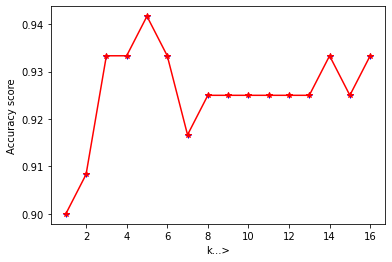

In [40]:
plt.plot(k_range,acc_list_scc,'b+')
plt.plot(k_range,acc_list_scc,'r*-')
plt.xlabel("k...>")
plt.ylabel("Accuracy score")
plt.show()